In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import statsmodels.tools.tools as stattools

In [20]:
car_d = pd.read_excel('H:/Krishna/GCU/DSC 540/Topic 5/Topic5_Assignment.xlsx',header=0)

In [21]:
car_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Day         14 non-null     object
 1   Temp x1     14 non-null     object
 2   Wind x2     14 non-null     object
 3   Traffic x3  14 non-null     object
 4   Car y       14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [22]:
car_d.head(5)

,Day,Temp x1,Wind x2,Traffic x3,Car y
0,s1,hot,weak,long,no
1,s2,hot,strong,long,no
2,s3,hot,weak,long,yes
3,s4,mild,weak,long,yes
4,s5,cool,weak,short,yes


In [36]:
# Let's convert all our input variables into categorical data and then use them for the decision tree
# The factorize function in pandas will help in getting the factors for the categorical input variables
# These factors will be used as input for the decision tree

Temp_labels,Temp_uniques=pd.factorize(car_d['Temp x1'])
Wind_labels,Wind_uniques=pd.factorize(car_d['Wind x2'])
Traffic_labels,Traffic_uniques=pd.factorize(car_d['Traffic x3'])
decision_labels,decision_uniques=pd.factorize(car_d['Car y'])

In [37]:
# The categorical factor variables are appended to the dataframe
car_d['Temp_cat']=Temp_labels
car_d['Wind_cat']=Wind_labels
car_d['Traffic_cat']=Traffic_labels
car_d['Decision_cat']=decision_labels

In [38]:
# We can see the summary of the input datframe now has the factors for the categorical variables
car_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Day           14 non-null     object
 1   Temp x1       14 non-null     object
 2   Wind x2       14 non-null     object
 3   Traffic x3    14 non-null     object
 4   Car y         14 non-null     object
 5   Temp_cat      14 non-null     int64 
 6   Wind_cat      14 non-null     int64 
 7   Traffic_cat   14 non-null     int64 
 8   Decision_cat  14 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 1.1+ KB


In [39]:
# Below is the dataset with both the input and their corresponding factors
car_d

,Day,Temp x1,Wind x2,Traffic x3,Car y,Temp_cat,Wind_cat,Traffic_cat,Decision_cat
0,s1,hot,weak,long,no,0,0,0,0
1,s2,hot,strong,long,no,0,1,0,0
2,s3,hot,weak,long,yes,0,0,0,1
3,s4,mild,weak,long,yes,1,0,0,1
4,s5,cool,weak,short,yes,2,0,1,1
5,s6,cool,strong,short,no,2,1,1,0
6,s7,cool,strong,short,yes,2,1,1,1
7,s8,mild,weak,long,no,1,0,0,0
8,s9,cool,weak,short,yes,2,0,1,1
9,s10,mild,weak,short,yes,1,0,1,1


In [28]:
# Select the input variables for the Decision Tree algorithm and label them accordingly
car_in = car_d[['Temp_cat','Wind_cat','Traffic_cat']]
car_in_name=['Temp','Wind','Traffic']

In [29]:
car_in

,Temp_cat,Wind_cat,Traffic_cat
0,0,0,0
1,0,1,0
2,0,0,0
3,1,0,0
4,2,0,1
5,2,1,1
6,2,1,1
7,1,0,0
8,2,0,1
9,1,0,1


In [50]:
# Select the output variables for the Decision Tree algorithm and label them accordingly
car_out = car_d[['Decision_cat']]
car_out_name = ['no','yes']

In [119]:
# We will be using the DecisionTreeClassifier method with criterion set to entropy (c5.0) to build our decision tree
clf=DecisionTreeClassifier(criterion='entropy')
cart_app = clf.fit(car_in,car_out)

**Plotting The Complete Decision Tree**

[Text(181.35000000000002, 190.26, 'Traffic <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = yes'),
 Text(111.60000000000001, 135.9, 'Wind <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = no'),
 Text(55.800000000000004, 81.53999999999999, 'Temp <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = no'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(83.7, 27.180000000000007, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(167.4, 81.53999999999999, 'Temp <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = no'),
 Text(139.5, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(195.3, 27.180000000000007, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(251.10000000000002, 135.9, 'Wind <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = yes'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples =

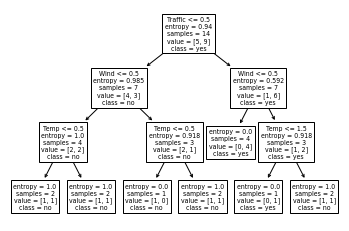

In [120]:
tree.plot_tree(cart_app,feature_names=car_in_name, class_names=car_out_name,impurity=True)

**Plotting a Partial Decision Tree**

In [129]:
# We will be using the DecisionTreeClassifier method with criterion set to entropy (c5.0) to build our decision tree. 
# The max_depth helps to pre-prune the tree and make sure it doesn't exceed the given depth
clf_part=DecisionTreeClassifier(criterion='entropy', max_depth = 2)
cart_app_part = clf_part.fit(car_in,car_out)

[Text(167.4, 181.2, 'Traffic <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = yes'),
 Text(83.7, 108.72, 'Wind <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = no'),
 Text(41.85, 36.23999999999998, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]\nclass = no'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = no'),
 Text(251.10000000000002, 108.72, 'Wind <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]\nclass = yes'),
 Text(209.25, 36.23999999999998, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = yes'),
 Text(292.95, 36.23999999999998, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]\nclass = yes')]

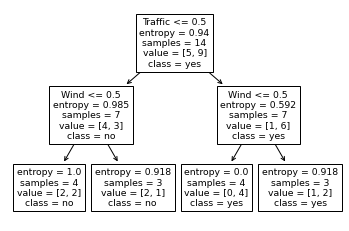

In [130]:
tree.plot_tree(cart_app_part,feature_names=car_in_name, class_names=car_out_name,impurity=True)